In [ ]:
#Import the dataset and explore basic info

In [6]:
import pandas as pd

# Path to the dataset
file_path = r"C:\Users\91907\Downloads\Titanic-Dataset.csv"

# Show basic information
print(df.info())
print(df.isnull().sum())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int6

In [ ]:
# Handle Missing Values

In [11]:
'''
The code implements a common data preprocessing step: 
filling in missing values (often represented as NaN or None in pandas). 
This process is called imputation, and it's critical because 
many machine learning algorithms cannot process datasets with missing values.

Numerical columns → use mean or median.
Categorical columns → use mode (most frequent).
'''

"\nThe code implements a common data preprocessing step: \nfilling in missing values (often represented as NaN or None in pandas). \nThis process is called imputation, and it's critical because \nmany machine learning algorithms cannot process datasets with missing values.\n\nNumerical columns → use mean or median.\nCategorical columns → use mode (most frequent).\n"

In [13]:
#df.select_dtypes(include=['int64', 'float64']).columns identifies all columns with numeric data types
# For numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
'''
For each numeric column, missing values are replaced with the median value of that column
Using the median (rather than mean) is often preferred because it's less sensitive to outliers
'''
for col in numerical_cols:
    df[col] = df[col].fillna(df[col].median())

In [18]:
# For categorical columns
#df.select_dtypes(include=['object']).columns finds all object-type columns (typically text/categorical data)
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

'''
For each categorical column, missing values are replaced with the mode (most frequent value)
.mode()[0] is used because pandas' mode() function returns a Series (potentially with multiple values if there's a tie),
so we take the first value
'''

'''
Why These Methods Were Chosen

Median for numerical data: The median represents the middle value when data is ordered.
It's robust to outliers, unlike the mean which can be skewed by extreme values.
Mode for categorical data: For categories, the most frequent value (mode) is a sensible replacement since concepts
like mean or median don't apply to non-numeric data.
'''

"\nWhy These Methods Were Chosen\n\nMedian for numerical data: The median represents the middle value when data is ordered.\nIt's robust to outliers, unlike the mean which can be skewed by extreme values.\nMode for categorical data: For categories, the most frequent value (mode) is a sensible replacement since concepts\nlike mean or median don't apply to non-numeric data.\n"

In [19]:
#Label Encoding 
'''
This code implements label encoding, which is a technique to convert categorical data (text or categories) into numeric form
so that machine learning algorithms can process them.
'''

In [21]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])


In [23]:
'''
Explanation:

1. Import: First, the LabelEncoder class is imported from scikit-learn's preprocessing module.
2. Initialization: An instance of LabelEncoder is created as le.
3. Loop Through Categorical Columns: The code iterates through each column previously identified as categorical (stored in categorical_cols).
4. Transformation: For each categorical column:

fit_transform() does two things:

fit: Learns the possible categories in the column
transform: Converts each category to a unique integer

For example, if a column contains ["red", "blue", "green", "red", "blue"], it might be transformed to [2, 0, 1, 2, 0].
'''

'\nExplanation:\n\n1. Import: First, the LabelEncoder class is imported from scikit-learn\'s preprocessing module.\n2. Initialization: An instance of LabelEncoder is created as le.\n3. Loop Through Categorical Columns: The code iterates through each column previously identified as categorical (stored in categorical_cols).\n4. Transformation: For each categorical column:\n\nfit_transform() does two things:\n\nfit: Learns the possible categories in the column\ntransform: Converts each category to a unique integer\n\nFor example, if a column contains ["red", "blue", "green", "red", "blue"], it might be transformed to [2, 0, 1, 2, 0].\n'

In [ ]:
# Normalize/Standardize the numerical features
'''
This code implements standardization (also called z-score normalization),
a common preprocessing technique that transforms numerical features to have a mean of 0 and a standard deviation of 1.
'''

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [28]:
'''Detailed Explanation:

Import: The code begins by importing StandardScaler from scikit-learn's preprocessing module.
Initialization: A StandardScaler object is created.
Transformation: The code applies the scaler to all numerical columns at once:

fit_transform() does two operations:

fit: Calculates the mean and standard deviation of each feature
transform: Applies the formula: (x - mean) / standard_deviation

Result: After transformation, each numerical feature will have:

Mean = 0
Standard deviation = 1
Values typically falling between -3 and +3

Why Standardization Matters:

1. Algorithm Performance: Many machine learning algorithms perform better with standardized data,
especially those that use distance calculations (like k-means clustering) or gradient descent optimization (like neural networks).

2. Feature Importance Parity: It prevents features with larger scales from dominating the model's learning process.
For example, without scaling, "income" (in thousands) might overshadow "age" (in years).

3. Convergence Speed: Gradient-based algorithms typically converge faster with standardized data.
'''

'Detailed Explanation:\n\nImport: The code begins by importing StandardScaler from scikit-learn\'s preprocessing module.\nInitialization: A StandardScaler object is created.\nTransformation: The code applies the scaler to all numerical columns at once:\n\nfit_transform() does two operations:\n\nfit: Calculates the mean and standard deviation of each feature\ntransform: Applies the formula: (x - mean) / standard_deviation\n\nResult: After transformation, each numerical feature will have:\n\nMean = 0\nStandard deviation = 1\nValues typically falling between -3 and +3\n\nWhy Standardization Matters:\n\n1. Algorithm Performance: Many machine learning algorithms perform better with standardized data,\nespecially those that use distance calculations (like k-means clustering) or gradient descent optimization (like neural networks).\n\n2. Feature Importance Parity: It prevents features with larger scales from dominating the model\'s learning process.\nFor example, without scaling, "income" (in

In [ ]:
# Visualize outliers using boxplots and remove them.

In [ ]:
# Part 1: Visualizing Outliers with Boxplots

In [32]:
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.3.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


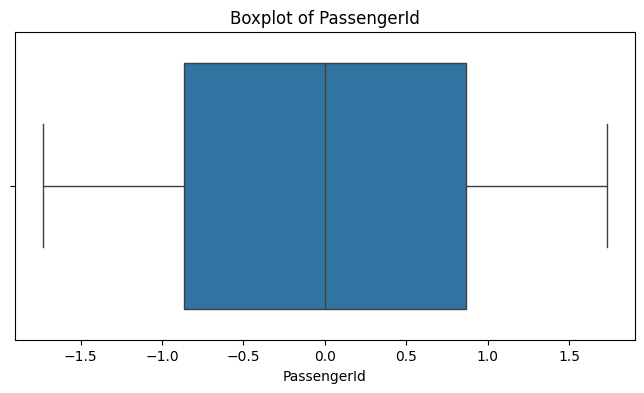

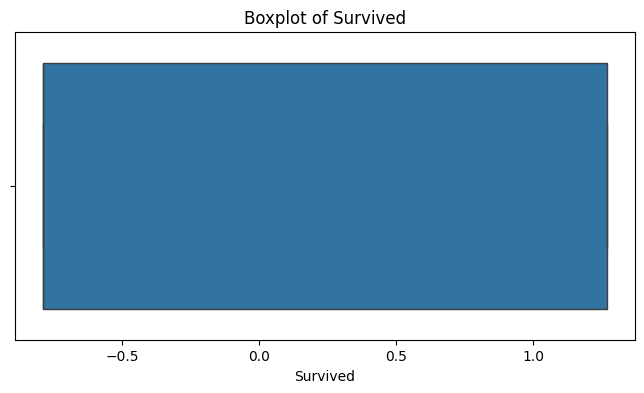

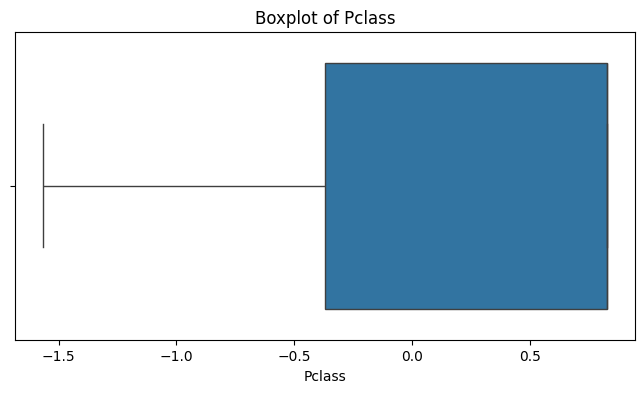

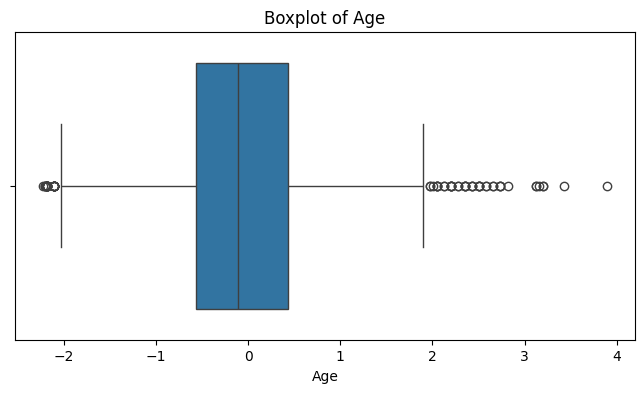

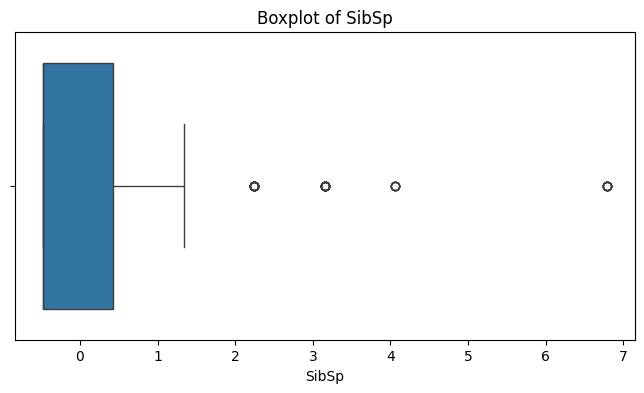

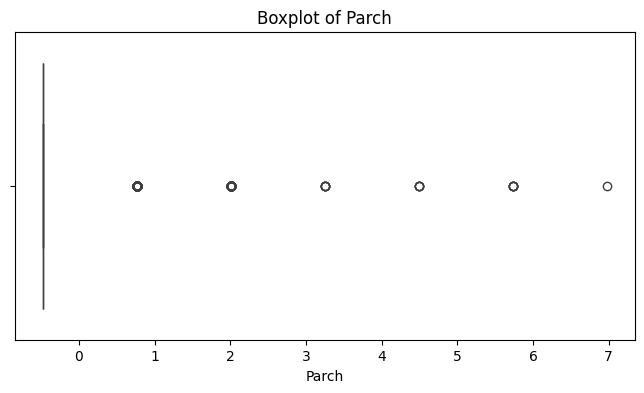

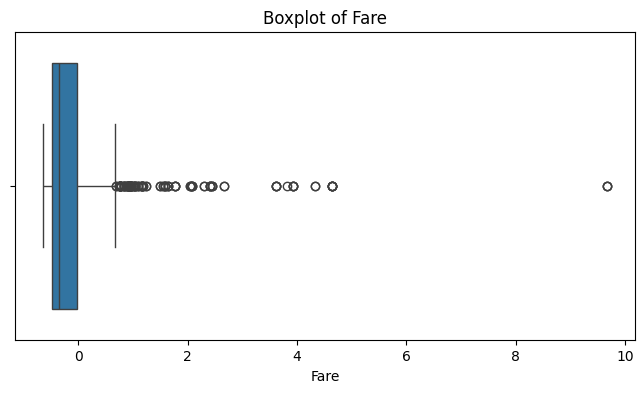

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot boxplots for all numerical columns
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()
    

In [37]:
'''
This code creates boxplots for each numerical column to visually identify outliers:

1. Import Visualization Libraries: Matplotlib for plotting basics and Seaborn for statistical visualizations
2. Loop Through Columns: For each numerical column, it creates a separate visualization
3. Create Boxplot: Generates a horizontal boxplot showing the distribution
4. Display: Shows the plot with a title indicating which column is being visualized

Boxplots show:

1. The median (middle line)
2. Interquartile range (IQR) - the box showing middle 50% of data
3. Whiskers extending to 1.5 × IQR
4. Points beyond whiskers representing potential outliers
'''

'\nThis code creates boxplots for each numerical column to visually identify outliers:\n\n1. Import Visualization Libraries: Matplotlib for plotting basics and Seaborn for statistical visualizations\n2. Loop Through Columns: For each numerical column, it creates a separate visualization\n3. Create Boxplot: Generates a horizontal boxplot showing the distribution\n4. Display: Shows the plot with a title indicating which column is being visualized\n\nBoxplots show:\n\n1. The median (middle line)\n2. Interquartile range (IQR) - the box showing middle 50% of data\n3. Whiskers extending to 1.5 × IQR\n4. Points beyond whiskers representing potential outliers\n'

In [38]:
# Removing Outliers using IQR Method

In [39]:
# Remove outliers
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    df = df[~((df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR)))]

In [ ]:
'''
This code implements the standard IQR method for outlier(An outlier is a data point that differs significantly from other
observations in a dataset. These are values that fall far away from the majority of data points and don't follow the general pattern
or distribution of the data.) removal:

Calculate Q1 & Q3: The 25th and 75th percentiles for each column
Calculate IQR: The difference between Q3 and Q1
Define Outlier Boundaries:

Lower bound: Q1 - 1.5 × IQR
Upper bound: Q3 + 1.5 × IQR


Filter Dataset: Remove rows with values outside these boundaries

~ operator negates the condition to keep non-outliers
The expression removes rows where ANY column's value is an outlier
'''